In [1]:
# Creating DataSet and Importing Libraries

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

#Creating classification Dataset
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)


In [2]:
# Splitting the data in train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)

In [3]:
# No-of datapoints in train and test data
print("X_train" ,len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("Y_test",len(Y_test))

X_train 7500
X_test 2500
Y_train 7500
Y_test 2500


From above we can say that we have 10000 datapoints. Out of which we have splited 7500 datapoints as training set and 2500 datapoints as test set

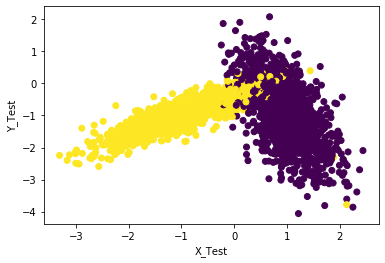

In [4]:
# Ploting the Test set datapoint
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.xlabel("X_Test")
plt.ylabel("Y_Test")
plt.show()


# Implementing Custom RandomSearchCV

In [5]:
# Implementing CustomRnadomSerachCV 

def Train_splits(X_train, folds):
    arr =np.arange(len(X_train))
    """
    This function will split the given Xtrain Indeces in to sub lists 
    No-of sublists produced using this function = folds(Int)
    This function will return lists of indeces to be used in K-fold crossvalidation
    """
    split_len = len(arr) / float(folds)
    parts = [] 
    start = 0.0

    while start < len(arr):
        parts.append(arr[int(start):int(start + split_len)])
        start = start + split_len

    return parts

def K_List(param_range):
    """
    This function will return the hyperparameter K values 
    in the given range
   """
    # Coverting tuple to list
    range_k = []
    for j in tqdm(param_range):
        range_k.append(j)
    #Generating 10 discrete random uniformly distributed k values in the given range
    if range_k[0] < range_k[1]:
        k = random.sample(range(range_k[0],range_k[1]+1), 10)
        
    k.sort() # Need to sort Hyperparameter values otherwise difficult to interpret graph to get best K  
    return k


def RandomSearchCV(x_train,y_train,classifier,param_range, folds):
    """
    This function will implement RandomSerach cross validation algorithm
    This function will return accuracy scores on Xtrain, Xcv at different K(Hyperparameter)values
    This function will also return the K (Hyperparameter) values, so that we can use K values while ploting graph 
    between Hyperparameters and Accuracy scores
    """
   
    # Creating hyperparameter K values List by calling the function K_List()
    params = K_List(param_range)
    
    trainscores = []
    testscores_cv  = []
    #spliting the indices of Xtrain in to k-fold() by calling the function Train_splits()
    K_folds_parts = Train_splits(x_train,folds) # 3 parts of Xtrain Indeces (As folds = 3)
  
    
    # Itterating over different K values (Hyperparameter)
    for k in params:
            #Implementing k-fold crossvalidation
            #Iterating over folds
            for i in range(folds):
                    testscores_folds=[]
                    trainscores_folds = []
                    x_CV_indexes = K_folds_parts[i] # CV indeces in each fold
                    #If folds=3 , The above line of code will give indeces of CV data
                    x_train_indexes = [] # Train Indeces in each fold
                    for j in range(folds):
                         if j != i:
                            x_train_indexes.extend(K_folds_parts[j])
                    
                    #The above for loop code will treat reamining indeces other than the Indexes for CV,as train indexes
                    
                    #Creating Crossvalidation and train dataset for ecah fold
                    x_CV = x_train[x_CV_indexes]
                    y_CV = y_train[x_CV_indexes]
                    x_TRAIN = x_train[x_train_indexes]
                    y_TRAIN = Y_train[x_train_indexes]
                    
                    # Training the model using each fold dataset
                    classifier.n_neighbors = k
                    classifier.fit(x_TRAIN,y_TRAIN)
                    #Model prediction on CV data and tarin data in each fold
                    Y_predicted_cv = classifier.predict(x_CV) # Using CV dataset in each fold
                    Y_predicted = classifier.predict(x_TRAIN) # Using Train dataset in each fold
                    # Test accuracy and train accutracy at each fold
                    testscores_folds.append(accuracy_score(y_CV, Y_predicted_cv))
                    trainscores_folds.append(accuracy_score(y_TRAIN, Y_predicted))
                    
                    # Like this the above code repaets for 3 times if folds =3, in each fold one part of dataset
                    #considered as CV dataset and remaining dataset as Train dataset and accuracy scores on CV 
                    #and train data is calculated
                    
                    
                    
            # Accuracies calculated for each value of K(Hyperparameter)   
            trainscores.append(np.mean(np.array(trainscores_folds)))
            testscores_cv.append(np.mean(np.array(testscores_folds))) 
      
    return trainscores,testscores_cv,params   # along with train and CV(test) accuracy scores, this function will 
                                              # K values used alsoreturns
    

# Hyperparameter vs accuracy plot

100%|██████████| 2/2 [00:00<?, ?it/s]


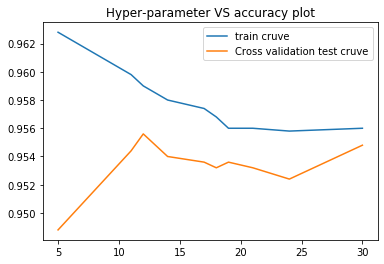

Training Accuracies = [0.9628, 0.9598, 0.959, 0.958, 0.9574, 0.9568, 0.956, 0.956, 0.9558, 0.956]
Training Accuracies = [0.9488, 0.9544, 0.9556, 0.954, 0.9536, 0.9532, 0.9536, 0.9532, 0.9524, 0.9548]
K = [5, 11, 12, 14, 17, 18, 19, 21, 24, 30]


In [10]:

# Importing Libraries
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Classifier we are using

neigh = KNeighborsClassifier()

# Range in which hyperparameter should lie
param_range = (3,30)
# No-of folds required for K-fold cross validation
folds = 3

# Obtainging accuracy scores (For CV , train dataset) and Hyperparameter value used  values 
trainscores,testscores,Hyperparameter = RandomSearchCV(X_train, Y_train, neigh, param_range, folds)
 
plt.plot(Hyperparameter,trainscores, label='train cruve')
plt.plot(Hyperparameter,testscores, label='Cross validation test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()




#Printing training and CV (testscores) that RandomserachCV gives
print("Training Accuracies","=",trainscores)
print("Training Accuracies","=",testscores)
print("K","=",Hyperparameter)

In [7]:
#To plot Decision boundary
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

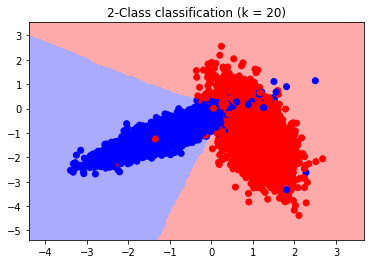

In [11]:
from matplotlib.colors import ListedColormap

# Training the model with Best value of K
neigh = KNeighborsClassifier(n_neighbors = 20)
neigh.fit(X_train, Y_train)

#Plot Decison Boundary
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)